In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('games_data_2fixx.csv')
dataset

,id,game,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time,recommend to play
0,0,A Boy and His Blob,638,2.02,2194,16.5,3.2,15,20,recommended
1,1,A Hat in Time,1992,1.53,7062,35.9,4.2,15,20,recommended
2,2,A Hero and a Garden,1364,1.01,503,97.6,5.0,0,1,recommended
3,3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,0,1,not recommended
4,4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,4,5,recommended
...,...,...,...,...,...,...,...,...,...,...
1579,1579,36 Fragments of Midnight,1367,1.06,8472,82.3,2.5,0,1,not recommended
1580,1580,36 Fragments of Midnight (Asia),1335,1.03,2131,88.9,2.4,0,1,not recommended
1581,1581,36 Fragments of Midnight (EU),1382,1.07,12273,79.2,2.4,0,1,not recommended
1582,1582,428: Shibuya Scramble,1943,1.47,916,41.5,4.2,40,50,recommended


In [3]:
dataset_baru = dataset.loc[:,['game','score','gamers','rating','recommend to play']]
dataset_baru

,game,score,gamers,rating,recommend to play
0,A Boy and His Blob,638,2194,3.2,recommended
1,A Hat in Time,1992,7062,4.2,recommended
2,A Hero and a Garden,1364,503,5.0,recommended
3,A Hero and a Garden (EU),1363,581,2.9,not recommended
4,A King's Tale: Final Fantasy XV,637,21914,3.3,recommended
...,...,...,...,...,...
1579,36 Fragments of Midnight,1367,8472,2.5,not recommended
1580,36 Fragments of Midnight (Asia),1335,2131,2.4,not recommended
1581,36 Fragments of Midnight (EU),1382,12273,2.4,not recommended
1582,428: Shibuya Scramble,1943,916,4.2,recommended


In [4]:
x = dataset_baru.loc[:, ['game','score','gamers','rating']].values
y = dataset_baru.loc[:, ['recommend to play']].values
print(x,y)

[['A Boy and His Blob' 638 2194 3.2]
 ['A Hat in Time' 1992 7062 4.2]
 ['A Hero and a Garden' 1364 503 5.0]
 ...
 ['36 Fragments of Midnight (EU)' 1382 12273 2.4]
 ['428: Shibuya Scramble' 1943 916 4.2]
 ['428: Shibuya Scramble (EU)' 1917 718 4.2]] [['recommended']
 ['recommended']
 ['recommended']
 ...
 ['not recommended']
 ['recommended']
 ['recommended']]


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_baru['game'] = le.fit_transform(dataset['game'].values)
y = le.fit_transform(y)
print(dataset_baru)
print(y)

      game  score  gamers  rating recommend to play
0       14    638    2194     3.2       recommended
1       15   1992    7062     4.2       recommended
2       16   1364     503     5.0       recommended
3       17   1363     581     2.9   not recommended
4       18    637   21914     3.3       recommended
...    ...    ...     ...     ...               ...
1579     9   1367    8472     2.5   not recommended
1580    10   1335    2131     2.4   not recommended
1581    11   1382   12273     2.4   not recommended
1582    12   1943     916     4.2       recommended
1583    13   1917     718     4.2       recommended

[1584 rows x 5 columns]
[1 1 1 ... 0 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
print(x,y)

[['A Boy and His Blob' 638 2194 3.2]
 ['A Hat in Time' 1992 7062 4.2]
 ['A Hero and a Garden' 1364 503 5.0]
 ...
 ['36 Fragments of Midnight (EU)' 1382 12273 2.4]
 ['428: Shibuya Scramble' 1943 916 4.2]
 ['428: Shibuya Scramble (EU)' 1917 718 4.2]] [1 1 1 ... 0 1 1]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
print(x_train)

[['Blues and Bullets' 1442 1700 3.4]
 ["Slayaway Camp: Butcher's Cut" 1581 2166 3.3]
 ['Agents of Mayhem' 2684 14809 3.3]
 ...
 ['Spyro the Dragon' 1689 73734 4.3]
 ['Gauntlet: Slayer Edition' 4064 33239 3.1]
 ['Iro Hero' 1356 1214 2.1]]


In [9]:
print(x_test)

[['Octodad: Dadliest Catch' 501 7145 3.7]
 ['Project Starship (EU)' 1338 1181 1.0]
 ['My Name is Mayo' 1375 48069 1.8]
 ...
 ['Knowledge is Power' 3873 32875 3.4]
 ["Broken Sword 5 – The Serpent's Curse" 1561 5943 3.7]
 ['Disc Jam' 587 50160 2.8]]


In [10]:
print(y_train)

[1 1 1 ... 1 1 0]


In [11]:
print(y_test)

[1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:5] = sc.fit_transform(x_train[:, 3:5])
x_test[:, 3:5] = sc.transform(x_test[:, 3:5])

In [13]:
print(x_train)

[['Blues and Bullets' 1442 1700 0.32581578879017475]
 ["Slayaway Camp: Butcher's Cut" 1581 2166 0.22403851946148842]
 ['Agents of Mayhem' 2684 14809 0.22403851946148842]
 ...
 ['Spyro the Dragon' 1689 73734 1.2418112127483512]
 ['Gauntlet: Slayer Edition' 4064 33239 0.02048398080411617]
 ['Iro Hero' 1356 1214 -0.9972887124827464]]


In [14]:
print(x_test)

[['Octodad: Dadliest Catch' 501 7145 0.6311475967762339]
 ['Project Starship (EU)' 1338 1181 -2.1168386750982955]
 ['My Name is Mayo' 1375 48069 -1.3026205204688053]
 ...
 ['Knowledge is Power' 3873 32875 0.32581578879017475]
 ["Broken Sword 5 – The Serpent's Curse" 1561 5943 0.6311475967762339]
 ['Disc Jam' 587 50160 -0.2848478271819429]]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
data = pd.read_csv("games_data_2fixx.csv")
data.head()

,id,game,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time,recommend to play
0,0,A Boy and His Blob,638,2.02,2194,16.5,3.2,15,20,recommended
1,1,A Hat in Time,1992,1.53,7062,35.9,4.2,15,20,recommended
2,2,A Hero and a Garden,1364,1.01,503,97.6,5.0,0,1,recommended
3,3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,0,1,not recommended
4,4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,4,5,recommended


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1584 non-null   int64  
 1   game               1584 non-null   object 
 2   score              1584 non-null   int64  
 3   leaderbord         1584 non-null   float64
 4   gamers             1584 non-null   int64  
 5   comp_perc          1584 non-null   float64
 6   rating             1584 non-null   float64
 7   min_comp_time      1584 non-null   int64  
 8   max_comp_time      1584 non-null   int64  
 9   recommend to play  1584 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 123.9+ KB


In [50]:
data['recommend to play'].unique()

array(['recommended', 'not recommended'], dtype=object)

In [51]:
recommend_game= 'recommended'
data[data['recommend to play']==recommend_game]

,id,game,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time,recommend to play
0,0,A Boy and His Blob,638,2.02,2194,16.5,3.2,15,20,recommended
1,1,A Hat in Time,1992,1.53,7062,35.9,4.2,15,20,recommended
2,2,A Hero and a Garden,1364,1.01,503,97.6,5.0,0,1,recommended
4,4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,4,5,recommended
5,5,A Plague Tale: Innocence,1691,1.34,22221,44.3,4.3,15,20,recommended
...,...,...,...,...,...,...,...,...,...,...
1572,1572,101 Ways to Die,2045,1.58,2151,30.9,3.3,10,12,recommended
1573,1573,11-11 Memories Retold,1863,1.41,2261,42.4,4.1,10,12,recommended
1576,1576,13 Sentinels: Aegis Rim,1672,1.24,10134,55.0,4.4,30,35,recommended
1582,1582,428: Shibuya Scramble,1943,1.47,916,41.5,4.2,40,50,recommended


In [52]:
not_recommend_game= 'not recommended'
data[data['recommend to play']==not_recommend_game]

,id,game,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time,recommend to play
3,3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,0,1,not recommended
6,6,A Summer with the Shiba Inu,1372,1.02,640,96.1,2.7,0,1,not recommended
7,7,A Summer with the Shiba Inu (Asia),1359,1.01,377,98.7,2.8,0,1,not recommended
8,8,A Summer with the Shiba Inu (EU),1376,1.02,719,95.7,1.7,0,1,not recommended
10,10,A Winter's Daydream,1303,1.01,2249,98.0,2.1,0,1,not recommended
...,...,...,...,...,...,...,...,...,...,...
1577,1577,1979 Revolution: Black Friday,1598,1.22,1384,58.2,2.4,3,4,not recommended
1578,1578,2064: Read Only Memories,2908,2.15,7163,13.9,3.0,15,20,not recommended
1579,1579,36 Fragments of Midnight,1367,1.06,8472,82.3,2.5,0,1,not recommended
1580,1580,36 Fragments of Midnight (Asia),1335,1.03,2131,88.9,2.4,0,1,not recommended


In [58]:
very_recommended_game = data[data.score>4000]['game'].unique()
very_recommended_game.sort()
very_recommended_game

array(['ARK: Survival Evolved', 'Batman: Arkham Knight', 'Battleborn',
       'Battlefield 1', 'Battlefield Hardline',
       'BioShock Infinite: The Complete Edition', 'Blood & Truth',
       'Borderlands 2', 'Borderlands 3 (PS4)',
       'Borderlands: The Pre-Sequel', 'Burnout Paradise Remastered',
       'Call of Duty: Advanced Warfare', 'Call of Duty: Black Ops 4',
       'Call of Duty: Black Ops III', 'Call of Duty: Ghosts',
       'Call of Duty: WWII', 'Cities: Skylines', 'DOOM (2016)',
       'DRIVECLUB', 'Dark Cloud 2', 'Days Gone',
       'Dead Nation: Apocalypse Edition', 'Dead by Daylight 1/2 (PS4)',
       'Deus Ex: Mankind Divided', 'Devil May Cry 4 Special Edition',
       'DiRT Rally 2.0', 'Dishonored Definitive Edition',
       'Divinity: Original Sin - Enhanced Edition', 'Downwell',
       'Driveclub VR', 'EA SPORTS UFC 2',
       'Earth Defense Force 4.1: The Shadow of New Despair',
       'Enter the Gungeon', "Everybody's Golf",
       'Fall Guys: Ultimate Knockout',

In [62]:
verynot_recommended_game = data[data.score<300]['game'].unique()
verynot_recommended_game.sort()
verynot_recommended_game

array(['Arcade Archives Bomb Jack', 'Arcade Archives Buta san',
       'Arcade Archives City Connection', 'Arcade Archives Crazy Climber',
       'Arcade Archives Exerion', 'Arcade Archives Ikki',
       'Arcade Archives Magmax', 'Arcade Archives Mr.Goemon',
       'Arcade Archives Mutant Night', 'Arcade Archives NOVA2001',
       'Arcade Archives Ninja-Kid', 'Arcade Archives Ninja-Kid 2',
       'Arcade Archives Raiders 5', 'Arcade Archives Rygar',
       'Arcade Archives Scramble', 'Arcade Archives Shusse Ozumo',
       'Arcade Archives Terra Cresta', 'Arcade Archives Wonder Boy',
       'Big Dipper', 'CARAVAN STORIES (JP)',
       'God Eater Off Shot: Scene Rindou',
       'God Eater Off Shot: Scene Soma', 'HiQ Ace', 'HiQ Ace Unlimited',
       'HiQ Ace Unlimited (EU)', 'Kitten Squad', 'One Eyed Kutkh',
       'One Eyed Kutkh (EU)'], dtype=object)

In [74]:
very_recommended_game_case = []
for i in very_recommended_game:
  very_recommended_game_case.append(data[data.score>7000][data['game']==i][data['recommend to play']=='recommended'].score.sum())

<ipython-input-74-aec1d46565d9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  very_recommended_game_case.append(data[data.score>7000][data['game']==i][data['recommend to play']=='recommended'].score.sum())


In [72]:
print(set(zip(very_recommended_game,very_recommended_game_case)))

{('RESOGUN', 5964), ('Guitar Hero Live', 5159), ('Tricky Towers', 0), ('Trine 2: Complete Story (EU)', 4602), ('Sniper Elite 3', 4384), ('HITMAN 2', 7547), ('Divinity: Original Sin - Enhanced Edition', 4100), ('Just Cause 4', 4850), ('Killzone Shadow Fall', 6419), ('Just Cause 3', 4971), ('Gauntlet: Slayer Edition', 4064), ('Warframe (PS4)', 7883), ('Rainbow Moon', 4095), ('Prey', 4114), ('Borderlands: The Pre-Sequel', 4301), ('Downwell', 5965), ('DRIVECLUB', 12017), ('Pac-Man Championship Edition 2', 6333), ('Blood & Truth', 4861), ('ARK: Survival Evolved', 4957), ('Resident Evil Resistance', 0), ('Fortnite (PS4)', 8637), ('The Evil Within', 4736), ('World War Z', 4138), ('STAR OCEAN: Integrity and Faithlessness', 4488), ('Lords of the Fallen', 4467), ('STEEP', 5801), ('Gems of War', 9337), ('Borderlands 2', 4709), ('Thumper', 4753), ('Call of Duty: Black Ops III', 7300), ('Lovers in a Dangerous Spacetime', 4559), ('Tales of Zestiria', 4506), ('Star Wars Battlefront', 6006), ('Dishono

In [75]:
nan_indices = []
for i in range(len(very_recommended_game)):
  if type(very_recommended_game[i])==float:
    nan_indices.append(i)

In [76]:
unique_gameplay= list(very_recommended_game)
longest_comp_time_case = list(very_recommended_game_case)

In [78]:
for i in nan_indices:
  very_recommended_game.pop(i)
  very_recommended_game_case.pop(i)


very_recommended_game

array(['ARK: Survival Evolved', 'Batman: Arkham Knight', 'Battleborn',
       'Battlefield 1', 'Battlefield Hardline',
       'BioShock Infinite: The Complete Edition', 'Blood & Truth',
       'Borderlands 2', 'Borderlands 3 (PS4)',
       'Borderlands: The Pre-Sequel', 'Burnout Paradise Remastered',
       'Call of Duty: Advanced Warfare', 'Call of Duty: Black Ops 4',
       'Call of Duty: Black Ops III', 'Call of Duty: Ghosts',
       'Call of Duty: WWII', 'Cities: Skylines', 'DOOM (2016)',
       'DRIVECLUB', 'Dark Cloud 2', 'Days Gone',
       'Dead Nation: Apocalypse Edition', 'Dead by Daylight 1/2 (PS4)',
       'Deus Ex: Mankind Divided', 'Devil May Cry 4 Special Edition',
       'DiRT Rally 2.0', 'Dishonored Definitive Edition',
       'Divinity: Original Sin - Enhanced Edition', 'Downwell',
       'Driveclub VR', 'EA SPORTS UFC 2',
       'Earth Defense Force 4.1: The Shadow of New Despair',
       'Enter the Gungeon', "Everybody's Golf",
       'Fall Guys: Ultimate Knockout',

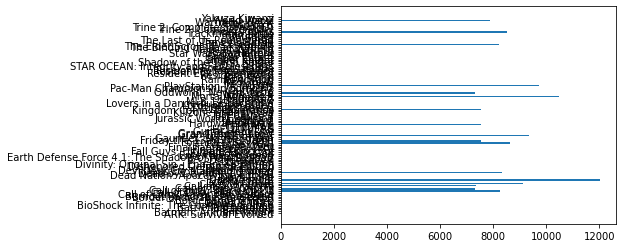

In [85]:
plt.barh(very_recommended_game,very_recommended_game_case)
plt.show()

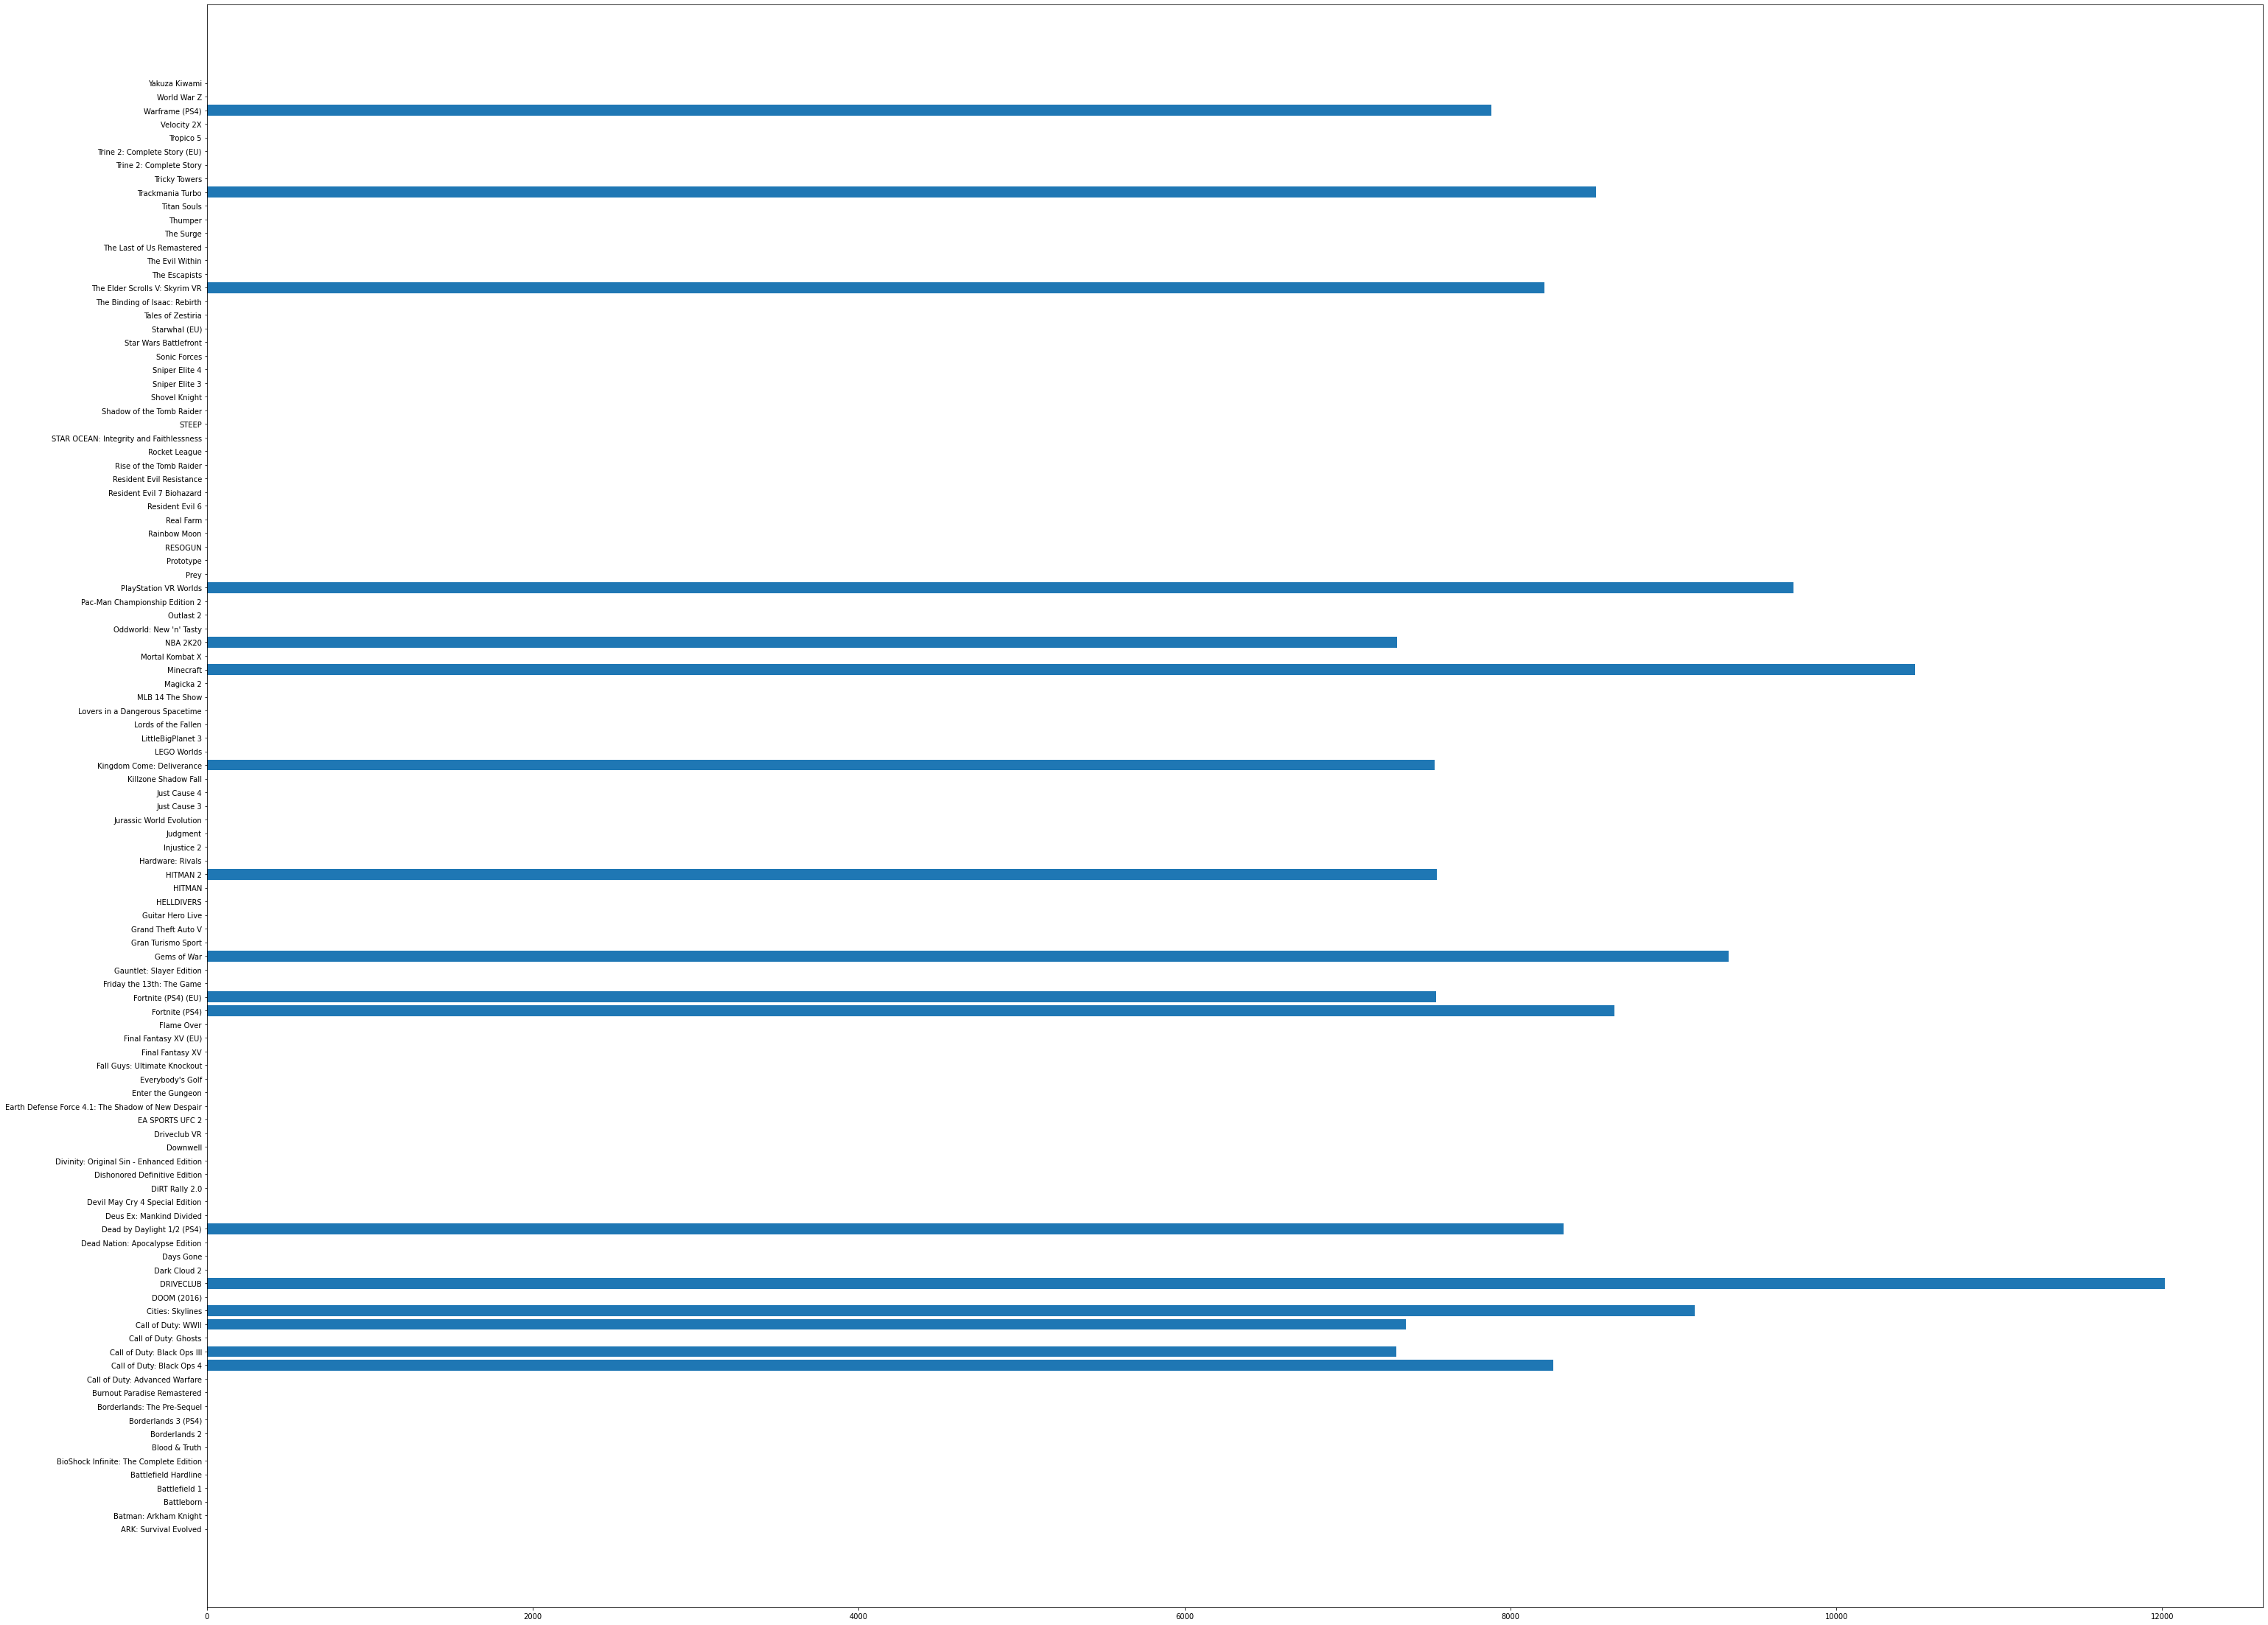

In [86]:
plt.figure(figsize=(50,40))
plt.barh(very_recommended_game,very_recommended_game_case)
plt.show()

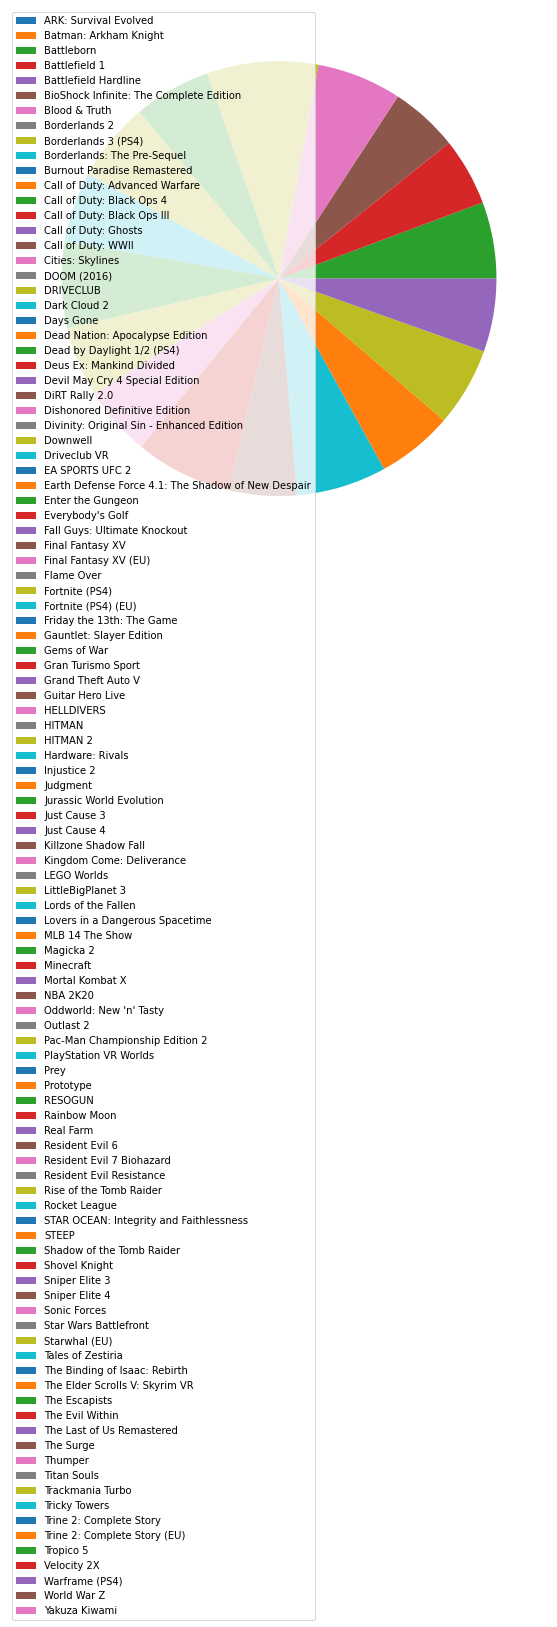

In [88]:
plt.figure(figsize=(10,10))
plt.pie(very_recommended_game_case)
plt.legend(very_recommended_game, loc='best')
plt.show()

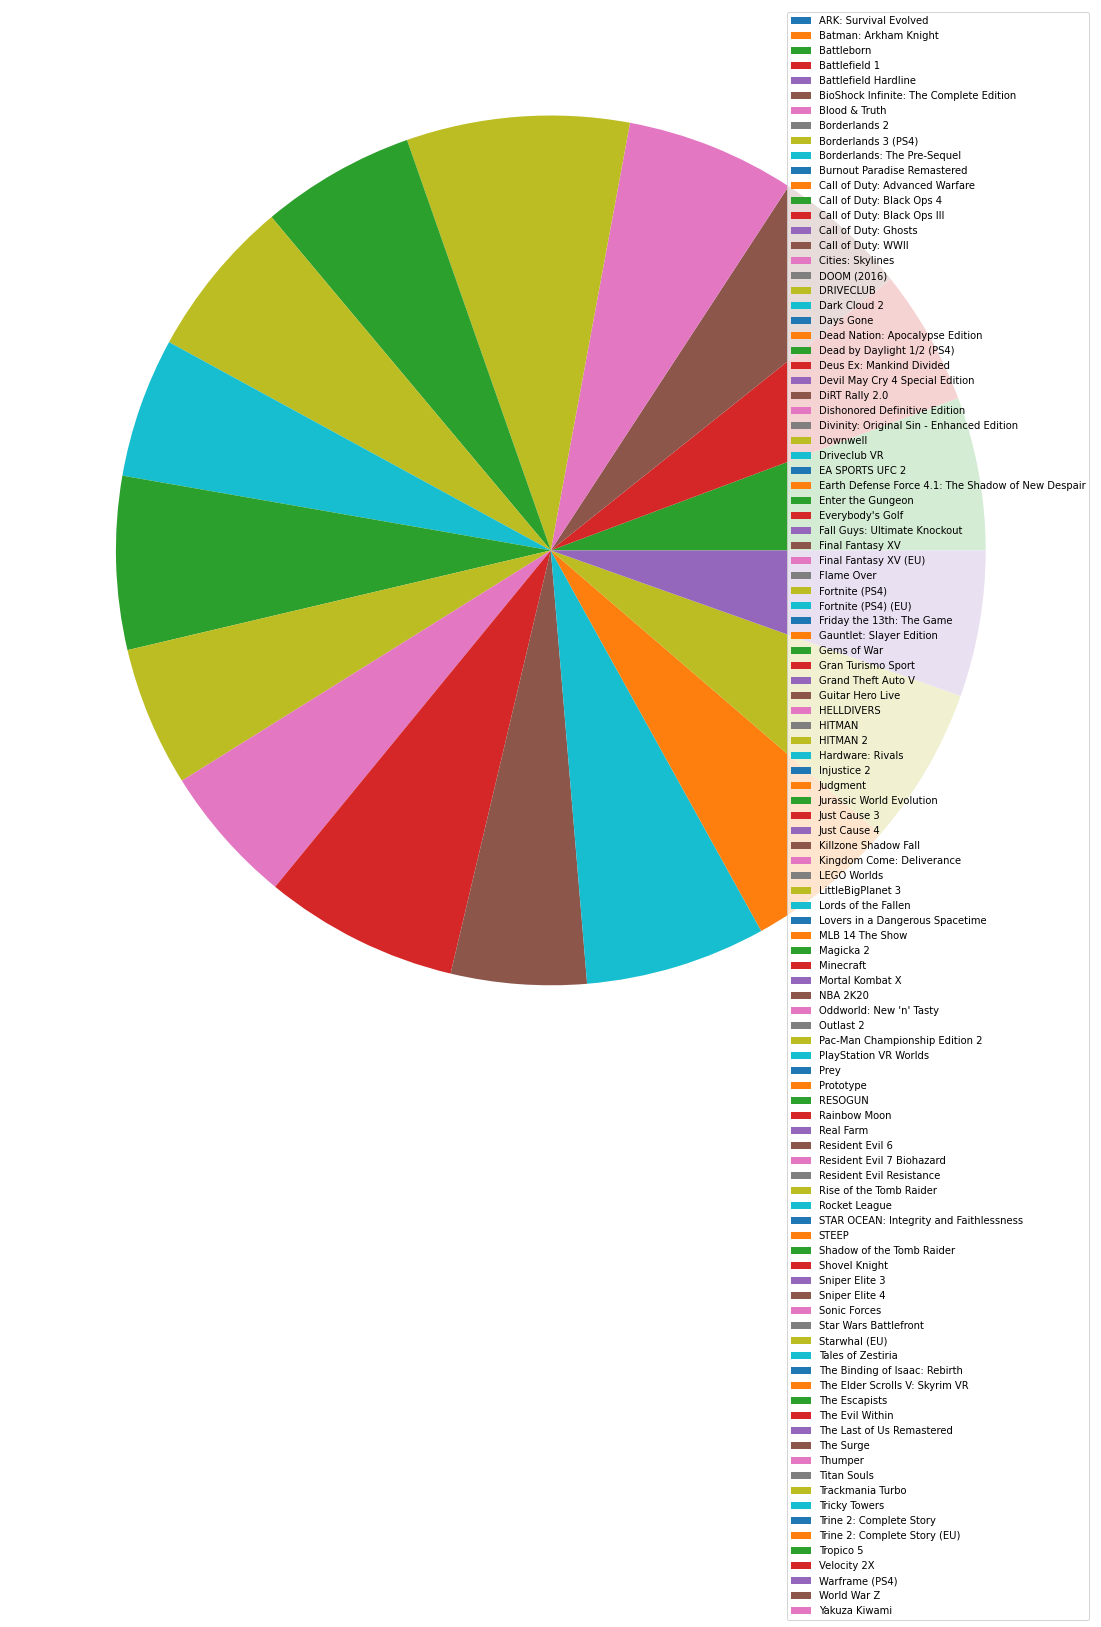

In [89]:
plt.figure(figsize=(20,20))
plt.pie(very_recommended_game_case)
plt.legend(very_recommended_game, loc='best')
plt.show()